<a href="https://colab.research.google.com/github/JaaumG/lm35_filter_design/blob/main/lm35_filter_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequência de corte normalizada (wn): 6.12389506512418e-05


<ipython-input-4-3218b78d8643>:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


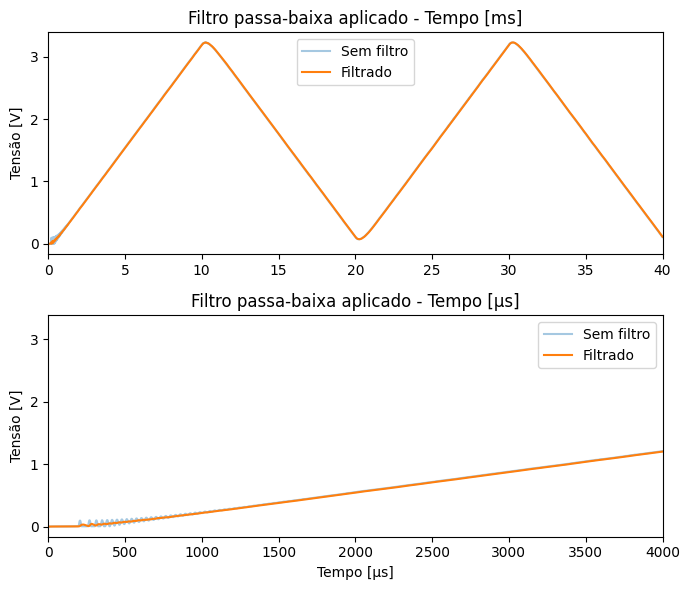

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

arquivo = "exported_lm35.txt"
tempo, tensao_original = np.loadtxt(arquivo, unpack=True, skiprows=1)

media_tempo = np.diff(tempo).mean()
frq_sinal = 1.0 / media_tempo

frq_corte = 10_000.0

# Normaliza a frequência de corte para a Nyquist (fs / 2)
frq_nrm_corte = frq_corte / (frq_sinal / 2)
print(f"Frequência de corte normalizada (wn): {frq_nrm_corte}")

b, a = signal.butter(2, frq_nrm_corte, btype='low')

tensao_filtrada = signal.lfilter(b, a, tensao_original)

fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=False)

axs[0].plot(tempo * 1e3, tensao_original, label="Sem filtro", alpha=.4)
axs[0].plot(tempo * 1e3, tensao_filtrada, label="Filtrado", linewidth=1.5)
axs[0].set_xlim(0, 40)
axs[0].set_ylabel("Tensão [V]")
axs[0].legend()
axs[0].set_title("Filtro passa-baixa aplicado - Tempo [ms]")

axs[1].plot(tempo * 1e6, tensao_original, label="Sem filtro", alpha=.4)
axs[1].plot(tempo * 1e6, tensao_filtrada, label="Filtrado", linewidth=1.5)
axs[1].set_xlim(0, 4000)
axs[1].set_xlabel("Tempo [µs]")
axs[1].set_ylabel("Tensão [V]")
axs[1].legend()
axs[1].set_title("Filtro passa-baixa aplicado - Tempo [µs]")

plt.tight_layout()
plt.show()
